## Instructor Task

## Part I - Logistic Regression

### Dataset
- Here is the [dataset](https://s3-us-west-2.amazonaws.com/ga-dat-2015-suneel/datasets/breast-cancer.csv)
- Here is a [description](https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.names) of the data. Ignore column 0 as it is merely the ID of a patient record.

### 1. Read in the data

In [1]:
import pandas as pd
from functools import reduce

In [4]:
breastCancer = pd.read_csv("breast-cancer.csv",header=None)
breastCancer.head(5)

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [13]:
breastCancer.shape

(569, 31)

In [13]:
#features extracted from below information
'''
radius (mean of distances from center to points on the perimeter)
	b) texture (standard deviation of gray-scale values)
	c) perimeter
	d) area
	e) smoothness (local variation in radius lengths)
	f) compactness (perimeter^2 / area - 1.0)
	g) concavity (severity of concave portions of the contour)
	h) concave points (number of concave portions of the contour)
	i) symmetry 
	j) fractal dimension ("coastline approximation" - 1)
    
The mean, standard error, and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features.
'''
features = ["radius","texture","perimeter","area","smoothness","compactness","concavity","concave_points","symmetry","fractal_dimension"]
#since our feature set is small, I am going to go ahead and manually concatenate these varieties
feature_means = [f+"_mean" for f in features]
feature_SE = [f+"_SE" for f in features]
feature_Worst = [f+"_Worst" for f in features]
feature_cols = reduce(lambda x,y: x+y, [["patient_id","diagnosis"],feature_means,feature_SE,feature_Worst])

breastCancer.columns = feature_cols
breastCancer.set_index("patient_id");

### 2. Separate the data into feature and target

In [295]:
featuresData = breastCancer[feature_cols[2:]]
target = breastCancer["diagnosis"]
featuresData.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_SE', 'texture_SE', 'perimeter_SE', 'area_SE', 'smoothness_SE',
       'compactness_SE', 'concavity_SE', 'concave_points_SE', 'symmetry_SE',
       'fractal_dimension_SE', 'radius_Worst', 'texture_Worst',
       'perimeter_Worst', 'area_Worst', 'smoothness_Worst',
       'compactness_Worst', 'concavity_Worst', 'concave_points_Worst',
       'symmetry_Worst', 'fractal_dimension_Worst'],
      dtype='object')

### 3. Create and evaluate using cross_val_score and 5 folds.

- What is the mean accuracy?
- What is the standard deviation of accuracy?

In [334]:
from sklearn.linear_model import LogisticRegression 

LogReg = LogisticRegression()

In [335]:
scores  = CV(LogReg, featuresData, target, cv=5, scoring="accuracy")

In [336]:
print(("The Mean Accuracy is {0:0.3f} the Standard Deviation is {1:0.3f}").format(scores.mean(), scores.std()))

The Mean Accuracy is 0.953 the Standard Deviation is 0.016


### 4. Get a classification report to identify type 1, type 2 errors. 

- Use train_test_split to run your model once, with a test size of 0.33
- Make preidctions on the test set
- Compare the predictions to the answers to determine the classification report

In [469]:
train, test = breastCancer.sample(frac=.67), breastCancer.drop(train.index)
trainX, trainY = train[feature_cols[2:]], train["diagnosis"]
testX, testY = test[feature_cols[2:]], test["diagnosis"]

In [470]:
LogReg.fit(trainX, trainY)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [471]:
from sklearn.metrics import confusion_matrix as CM
from sklearn.metrics import f1_score
ClassificationReport = CM(LogReg.predict(testX), testY)
ClassificationReport

array([[110,   8],
       [  5,  65]])

In [472]:
f1_score(LogReg.predict(testX), testY, pos_label="M")

0.90909090909090906

### Type I and Type II Errors
* There are 5 Type I Errors
* There are 8 Type II Errors
* The F1 Score (precision and recall combined score) is 91%

### 5. Scale the data and see if that improves the score

In [473]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
trainScaledX = scaler.fit_transform(trainX)
testScaledX = scaler.transform(testX)
LogReg.fit(trainScaledX,trainY)
ClassificationReport = CM(LogReg.predict(testScaledX), testY)
ClassificationReport

array([[113,   5],
       [  2,  68]])

In [474]:
f1_score(LogReg.predict(testScaledX), testY, pos_label="M")

0.95104895104895115

### Type I and Type II Errors
* There are 2 Type I Errors
* There are 5 Type II Errors
* The F1 Score (precision and recall combined score) is 95%
* We see an overall improvement when we scale our data

### 6. Tune the model using automated parametrics grid search via LogisticRegressionCV. Explain your intuition behind what is being tuned. 

In [475]:
from sklearn.grid_search import GridSearchCV
params = [
  {'C': [0.05,0.1,0.25,0.5,1, 10, 100, 1000], 'penalty': ['l1','l2']}
 ]
gs = GridSearchCV(LogReg,params,scoring="accuracy")
gs.fit(trainScaledX, trainY)

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'penalty': ['l1', 'l2'], 'C': [0.05, 0.1, 0.25, 0.5, 1, 10, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [476]:
print(gs.best_params_, gs.best_score_)
CM(gs.predict(testScaledX),testY)

{'penalty': 'l2', 'C': 0.25} 0.965879265092


array([[113,   6],
       [  2,  67]])

#### Q: What should we do to prevent overfitting so our model generalizes well to the test data?

* Logistic regression attempts to minimize the error between what we are predicting with our model and our real value 
* However, since we have a small number of samples and a decent number of features, we run the risk of creating a model that optimizes too tightly to idiosyncrasies in our training data, and not being general enough to predict on real world data.
* This phenomenon is known as overfitting.
* One way to address this overfitting problem is to introduce a regularization penalty 
* Here we use l1 and l2 penalties
    * l1 for sparse coefficients, IE some coefficients in our model become zero
    * l2 for jointly shrinking coefficients, IE some highly correlated coeffiencts are jointly shrunk
* C is the magnitude of the regularization penalty we are applying to our data
* Smaller numbers mean harsher regularization, as the default C is 1, we are testing magnitutdes that are harsher and those that are less punitive


* Note, we should also perform test/train splitting and cross validation on our models to reduce overfitting 

#### Q: What was the best C?

C = .25 performed the best

### 7. Create Two Plots that describe the data and discuss your results

In [583]:
import numpy as np
Coeff = pd.DataFrame(list(zip(trainX.columns,gs.best_estimator_.coef_[0])),columns=["Features","Coefficient"])
Coeff["Absolute"] = np.absolute(Coeff["Coefficient"]).round(3)
Coeff.sort_values(by="Absolute",ascending=False).head(5)

,Features,Coefficient,Absolute
20,radius_Worst,0.648338,0.648
27,concave_points_Worst,0.630290,0.630
10,radius_SE,0.615102,0.615
7,concave_points_mean,0.601337,0.601
23,area_Worst,0.600772,0.601


* There were the top 5 features as predicted by our logistic model

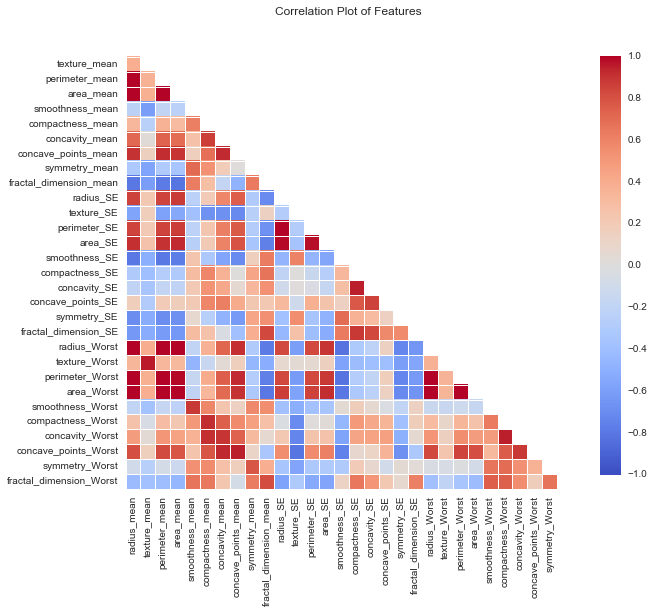

In [516]:
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,10))

warnings.filterwarnings('ignore') 
'''
note regarding the warning import, I am using a soon to be deprecated function in seaborn 
it's possible to do the same visualization with the heatmap plot, 
but this saves some fiddling with masking repeating values
'''
sns.plt.title('Correlation Plot of Features')
sns.corrplot(featuresData.corr(), annot=False, diag_names=False)

* Correlation Plots are often useful to visualize relationships between variables
* With this visualization we can see positive and negative interactions for each of the features in our dataset
* For example, "Radius Worst" the top coefficient in our linear model is positively correlated with perimeter means, and area means(this makes sense), but also with concave points mean and negatively correlated with fractal dimension means and smoothness SE
* Correlation Plots are also useful in linearly seperated data (which our logistic regression model assumes), as variables may be "confounding" as in they are highly correlated with each other but not predictive alone
* This can serve as a bit of a sanity check, and a reason to do some ANOVA filtering to reduce potentially spurious variables

### Visualizing Our Top Coefficients

In [581]:
top5features = Coeff.sort_values(by="Absolute",ascending=False).head(5).Features.tolist()

In [582]:
def binMap(x):
    if x == 'M':
        return 1
    else:
        return 0
breastCancer['binaryDiagnosis'] = breastCancer.diagnosis.apply(lambda x: binMap(x))

In [585]:
top5 = breastCancer[top5features]
top5df = pd.DataFrame(top5,columns=top5features).join(breastCancer['binaryDiagnosis'])

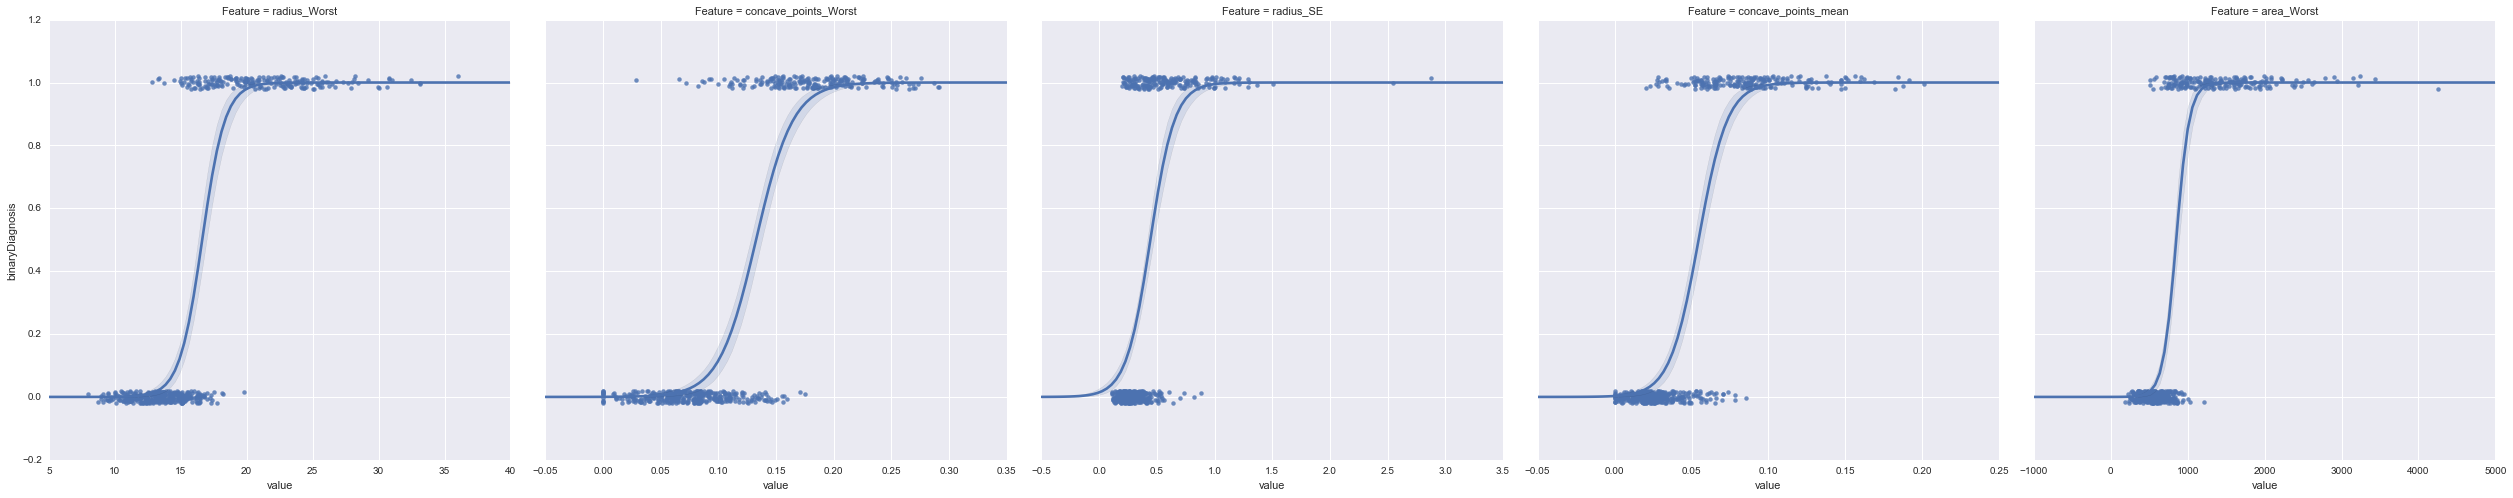

In [589]:
meltedBC = pd.melt(top5df, id_vars=['binaryDiagnosis'], var_name='Feature')
sns.lmplot(x="value", y="binaryDiagnosis",col='Feature',data=meltedBC, y_jitter=.02, logistic=True,  size=7, sharex=False)

In [595]:
radiiMask = top5df["radius_Worst"] >20 
top5df[radiiMask==True].binaryDiagnosis.value_counts() 

1    121
Name: binaryDiagnosis, dtype: int64

In [601]:
top5df[radiiMask==True].binaryDiagnosis.value_counts()/ top5df.binaryDiagnosis.value_counts()[1]

1    0.570755
Name: binaryDiagnosis, dtype: float64

* Here I graphed the cumulative distribution function of our top 5 coefficients
* These graphs show how an increase in one of these coefficients coresponds to an increase in probability to having a malignant tumor
* Looking at these plots we can find good insights, such as if a tumor has a radius greater than 20, there is a **100% chance** 
it is a malignant tumor, which is why this feature was the strongest in our dataset
* Tumor radius > 20, correctly identifies **57% of all true positive tumors**

### 8. Provide a one-sentence summary for a non-technical audience. Then provide a longer paragraph-length technical explanation.

### High Level
* Using machine learning model called logistic regression, we can predict canerous tumors with 96.5% accuracy.

### Technical Audience
* Overall our logistic regression model with l2 penalty was 96.5% accurate in predicting which tumors are cancerous, the model incorrectly identified 5 false negatives in the test set.  
* Although our model has good performance a false negative is highly undesirable in this context
(cancerous tumors go undiagnosed!), so we should seek to improve this result. 
* Whenever encountering a supervised machine learning problem we need to consider if a linear model
(logistic regression, SVM etc) is the most approriate solution. One of the requirements
is that this model needs linearly seperately data. 
* Linearly seperatable data will be normally distributed, we can check our assumption on this dataset with a statistical test such as shapiro wilks.
* We should try alternative methods, such as as random forests or certain neural networks which are non-parametic( does make assumptions regarding normally distributed data) to find better results
* As we saw when we visualized the data, we have a lot of correlations with our features due to their construction.  For example, "radius" will be linked to "perimeter", and "radius mean" will be correlated to "radius worst", ANOVA filtering or a grid search could prune some of these features

## Part II - Ensemble Methods

### Dataset
- Your dataset will be the breast cancer dataset. You can load it directly from scikit-learn using the load_breast_cancer function.

### 1. Read in the data

In [477]:
from sklearn.datasets import load_breast_cancer
data = pd.DataFrame(load_breast_cancer()['data'])
features = load_breast_cancer()['feature_names']
target = load_breast_cancer()['target']
data.columns = features

### 2. Separate the data into feature and target

In [478]:
data, target;

### 3. Build and initial model

1. Initialize a Decision Tree Classifier and use cross_val_score to evaluate it's performance. Set crossvalidation to 5-folds
2. Wrap a Bagging Classifier around the Decision Tree Classifier and use cross_val_score to evaluate it's performance. Set crossvalidation to 5-folds.
3. Which score is better? Are the score significantly different? How can you judge that?

In [483]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

DTclf = DecisionTreeClassifier(random_state=12)
DTScores = CV(DTclf, data, target, cv=5,scoring="accuracy")

BaggingDT = BaggingClassifier(DecisionTreeClassifier(random_state=12))
DTBagScores = CV(BaggingDT, data, target, cv=5,scoring="accuracy")
DTlogLoss, BaggingDTLogLoss = CV(DTclf, data, target, cv=5,scoring="log_loss").mean(), CV(BaggingDT, data, target, cv=5,scoring="log_loss").mean()

print(("The mean accuracy of the unbagged Decision Tree Model is {0:0.2f}, the bagged Decision Tree Model is {1:0.2f}").format(DTScores.mean(),DTBagScores.mean()))
print (("The log loss of the unbagged model is {0:0.2f} while the bagged model is {1:0.2f}").format(DTlogLoss, BaggingDTLogLoss))

The mean accuracy of the unbagged Decision Tree Model is 0.92, the bagged Decision Tree Model is 0.95
The log loss of the unbagged model is -2.67 while the bagged model is -0.46


* The accuracy of the bagged model is superior to the unbagged model
* Where the difference is more visible is the log loss
* Classification algorithims work to mimimize the cross-entropy difference between classes
* Log Loss penalizes algorithims for over confidence, if we were wrong and very confident 
in a prediction this has a more severe penalty 
* Thus we can see our bagged Decision Tree model is superior

### 4. Integrate your model into a pipeline

In [613]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

pipe = Pipeline([('transform',StandardScaler()),('clf',BaggingClassifier(DecisionTreeClassifier()))])
pipe.fit(trainX,trainY)
acc = accuracy_score(pipe.predict(testX),testY)
print(acc)

0.957446808511


### 5. Evaluate your performance utilizing grid search with 5-fold cross validation. 

In [612]:
DTparam = [{'max_features': list(range(1,31)),'bootstrap':[True,False],'n_estimators':[10,20,30,50]}]
DTGScv = GridSearchCV(BaggingClassifier(DecisionTreeClassifier()), DTparam,scoring="accuracy",cv=5)
DTGScv.fit(trainScaledX,trainY)
print(DTGScv.best_params_, DTGScv.best_score_)
CM(gs.predict(testScaledX),testY)

{'max_features': 13, 'bootstrap': True, 'n_estimators': 30} 0.965879265092


array([[113,   6],
       [  2,  67]])

* One of the results of the grid search is that we have reduced the number of features used to only 13, 
this makes some sense as standard error, mean, and "worst" exist  for 10 measures
* Our overall accruacy on the training set improved slightly, our confusion matrix shows test results similar to the linear model